<a href="https://colab.research.google.com/github/zhrnnsw/Machine-Learning/blob/main/week-4/Tugas_Praktikum_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas**

1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.
2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

  *   Menggunakan data spam.csv
  *   Fitur CountVectorizer dengan mengaktifkan stop_words
  *   Evaluasi hasilnya




3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

  *   Menggunakan data spam.csv
  *   Fitur TF-IDF dengan mengaktifkan stop_words
  *   Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
  *   Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv






## **Klasifikasi Data Suara  dengan SVM**

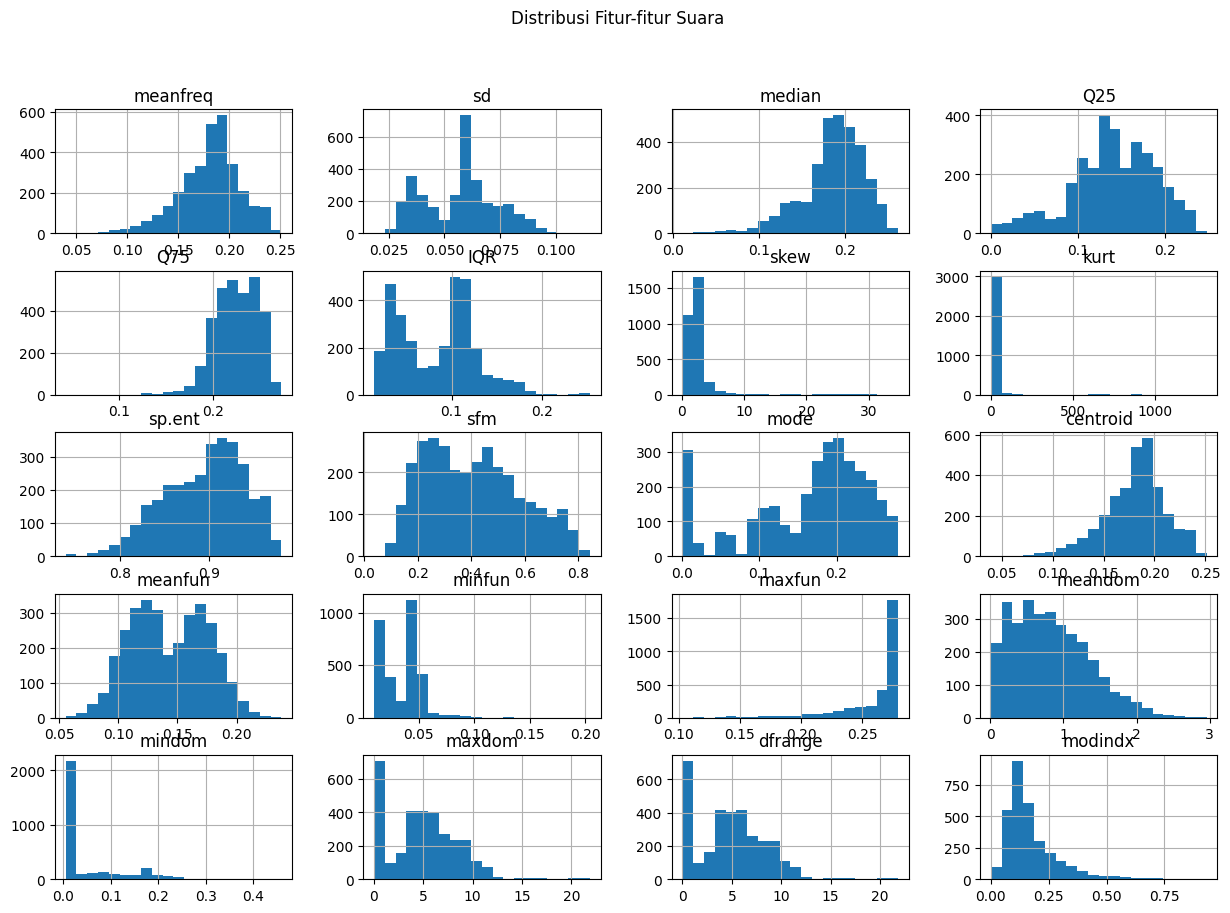

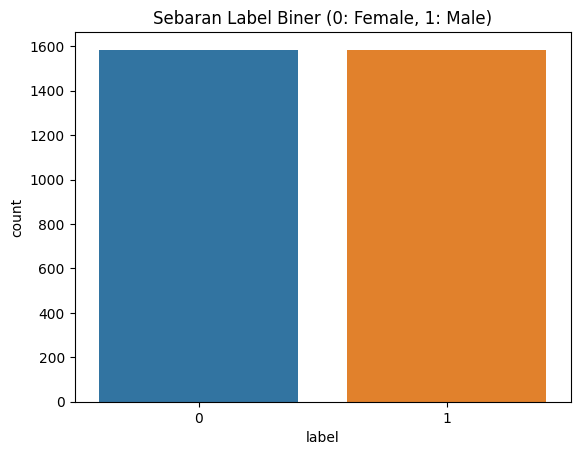

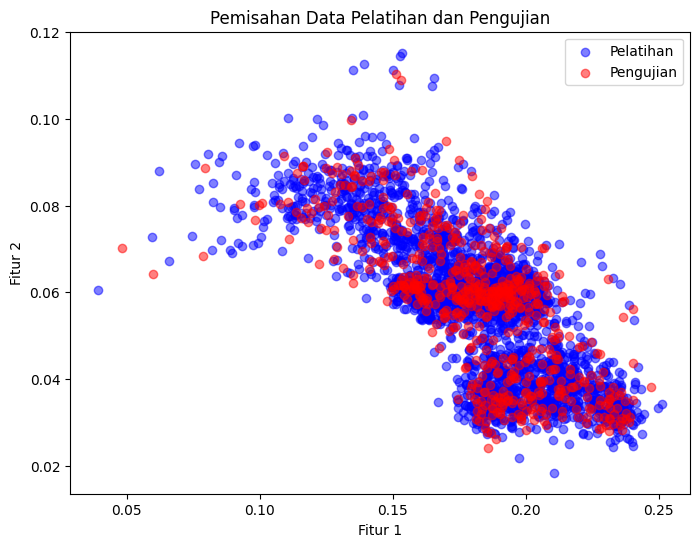

Akurasi: 0.94
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       297
           1       0.91      0.99      0.95       337

    accuracy                           0.94       634
   macro avg       0.95      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634



In [2]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Baca data dari file CSV
data = pd.read_csv("voice.csv")

# Visualisasi distribusi fitur-fitur suara
data.drop('label', axis=1).hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribusi Fitur-fitur Suara')
plt.show()

# Ubah kolom target menjadi label biner
data['label'] = np.where(data['label'] == 'male', 1, 0)

sns.countplot(x='label', data=data)
plt.title('Sebaran Label Biner (0: Female, 1: Male)')
plt.show()

# Pisahkan data menjadi atribut (X) dan label (y)
X = data.drop('label', axis=1)
y = data['label']

# Bagi data menjadi set pelatihan dan pengujian (misalnya, 80% pelatihan dan 20% pengujian)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualisasi pemisahan data pelatihan dan pengujian
plt.figure(figsize=(8, 6))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c='blue', label='Pelatihan', alpha=0.5)
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c='red', label='Pengujian', alpha=0.5)
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(loc='best')
plt.title('Pemisahan Data Pelatihan dan Pengujian')
plt.show()

# Buat model SVM
svm_model = SVC(kernel='linear', C=1)

# Latih model dengan data pelatihan
svm_model.fit(X_train, y_train)

# Prediksi dengan data pengujian
y_pred = svm_model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.2f}')

# Laporan klasifikasi
print(classification_report(y_test, y_pred))

## **Klasfikasi Multinomial Naive Bayes dengan Fitur CountVectorizer**

**Persiapan Data**

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Baca data dari file CSV
data = pd.read_csv("spam.csv", encoding="latin-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Pra Pengolahan Data**


1.   Drop Kolom




In [40]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = data.drop(data.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


  2. Ubah Nama Kolom V1 dan V2

In [41]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


  3. Inspeksi Data

In [42]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

ham     4825
spam     747
Name: Labels, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


  4. Encode Label
    
    Mengubah label menjadi angka 1 atau 0

In [43]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


  5. Memisahkan Fitur dengan Label

In [44]:
X = df['SMS'].values
y = df['Labels'].values

**Pemisahan Data Train dan
Data Tes**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


**Ekstraksi Fitur dengan CountVectorizer**

In [47]:
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [31]:
print(len(vectorizer.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

7472
Dimensi data: (4457, 7472)


**Training Model Multinomial Naive Bayes**

In [48]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

**Evaluasi Model**

In [49]:
# Prediksi dengan data training
y_pred_train = nb_model.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = nb_model.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

# Laporan klasifikasi
print(classification_report(y_test, y_pred_test))


Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9829596412556054
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       0.98      0.90      0.94       161

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



# **Klasfikasi Multinomial Naive Bayes dengan Fitur TF-IDF**

Persiapan Data

In [50]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Baca data dari file CSV
data = pd.read_csv("spam.csv", encoding="latin-1")


**Pra Pengolahan Data**


1.   Drop Kolom




In [51]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = data.drop(data.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


  2. Ubah Nama Kolom V1 dan V2

In [52]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


  3. Inspeksi Data

In [53]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

ham     4825
spam     747
Name: Labels, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


  4. Encode Label
    
    Mengubah label menjadi angka 1 atau 0

In [54]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


  5. Memisahkan Fitur dengan Label

In [55]:
X = df['SMS'].values
y = df['Labels'].values

**Pemisahan Data Train dan
Data Tes**

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


**Ekstraksi Fitur dengan TF-IDF**

In [58]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [60]:
print(len(tfidf_vectorizer.get_feature_names_out()))
print(f'Dimensi data: {X_train_tfidf.shape}')

7466
Dimensi data: (4457, 7466)


**Training Model Multinomial Naive Bayes dengan TF-IDF**

In [61]:
nb_model_tfidf = MultinomialNB()
nb_model_tfidf.fit(X_train_tfidf, y_train)


MultinomialNB()

**Evaluasi Model dengan TF-IDF**

In [63]:
# Prediksi dengan data training
y_pred_train_tfidf = nb_model.predict(X_train_tfidf)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = nb_model.predict(X_test_tfidf)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

# Laporan klasifikasi
print(classification_report(y_test, y_pred_test))


Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9757847533632287
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       954
           1       1.00      0.83      0.91       161

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.97      1115



# **Kesimpulan**
* Dalam tugas sebelumnya (Tugas No. 2), kita menggunakan CountVectorizer untuk menghasilkan fitur berdasarkan frekuensi kata-kata.
* Dalam tugas ini, kita menggunakan TfidfVectorizer untuk menghasilkan fitur berdasarkan bobot TF-IDF kata-kata.
* Untuk menentukan fitur mana yang terbaik, kita harus mempertimbangkan hasil evaluasi, terutama akurasi dan metrik lainnya.
* Dalam kasus ini hasil evaluasi dengan TfidfVectorizer (TF-IDF) seringkali lebih baik daripada dengan CountVectorizer, terutama dalam kasus data teks panjang atau ketika kata-kata umum yang sering muncul (stop words) perlu diabaikan. Namun, hasil ini juga tergantung pada karakteristik data yang digunakan.
* Kesimpulan akhir tentang fitur mana yang terbaik akan bergantung pada dataset dan tujuan analisisnya. Dalam banyak kasus, penggunaan TF-IDF bisa lebih unggul.